# Coronavirus 2020 - effectiveness of measures taken - Germany

- Please scroll down for plots.
- If in Binder/Jupyter notebook, and you want to execute this, press SHIFT+RETURN to advance code cell to code cell.
- Data is sourced from https://npgeo-corona-npgeo-de.hub.arcgis.com
- Acknowledgements:
  - great tutorials from https://www.youtube.com/channel/UCYO_jab_esuFRV4b17AJtAw
  - Open Source and scientific computing community for the data tools, github for hosting repository



In [1]:
%config InlineBackend.figure_formats = ['svg']
%matplotlib inline
# Alternative plotting backend for interative data exploration
# %matplotlib notebook

from oscovida import overview, fetch_data_germany, germany_get_region

# If you want to edit the source in the notebook, try "%load oscovida.py" 
# and comment out the import statement above.

# Warning

- this is work in progress
- we need some sanity checks of the data
  - the numbers for the last day (or last two) seem to very small. Presumably they are updated later. This affects the derived data
  - we should take the sum overall Germany, and compare with the Johns Hopkins data
  

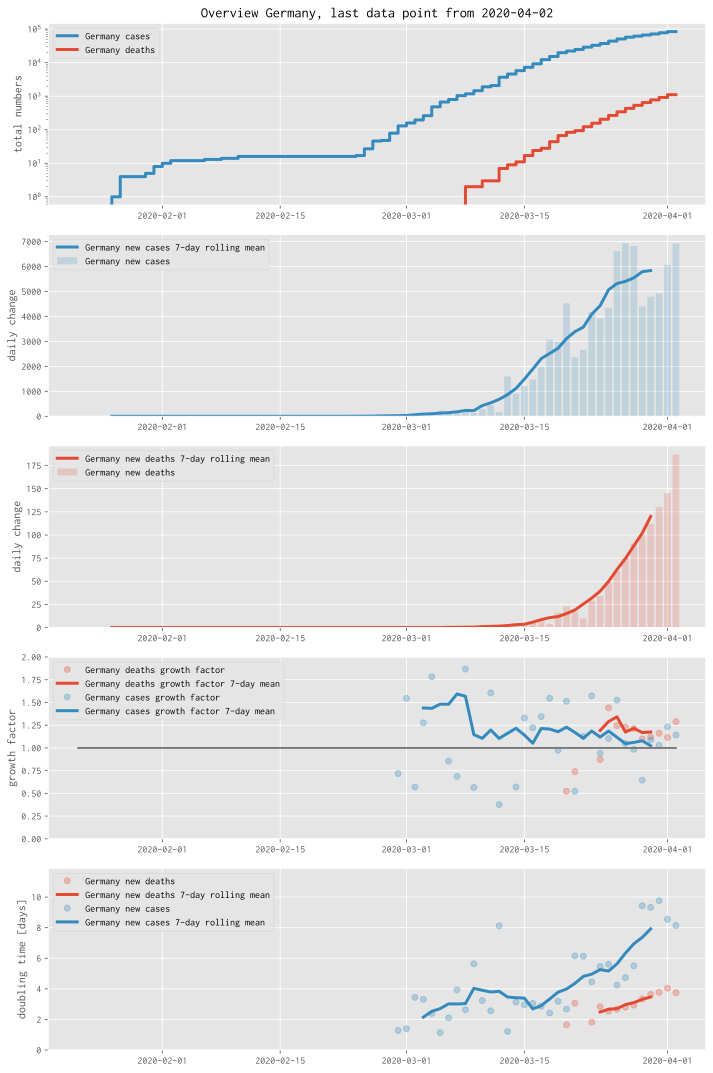

In [35]:
_, cases_jh, deaths_jh = overview("Germany");

# Hamburg

In [5]:
g = fetch_data_germany()
# g.to_csv('germany-2020-04-03-T2200.csv')

In [ ]:
germany = fetch_data_germany()


In [17]:
import pandas as pd

In [18]:
g2 = germany.set_index(pd.to_datetime(germany['Meldedatum']))

g2.index.name = 'date'
g3 = g2.groupby('date').agg('sum')
cases = g3["AnzahlFall"].groupby('date').agg('sum').cumsum()
deaths = g3["AnzahlTodesfall"].groupby('date').agg('sum').cumsum()
cases.country="RKI-accumulated"
deaths.country="RKI-accumulated"
deaths.label='deaths'
cases.label='cases'

In [27]:
import oscovida as co
import matplotlib.pyplot as plt

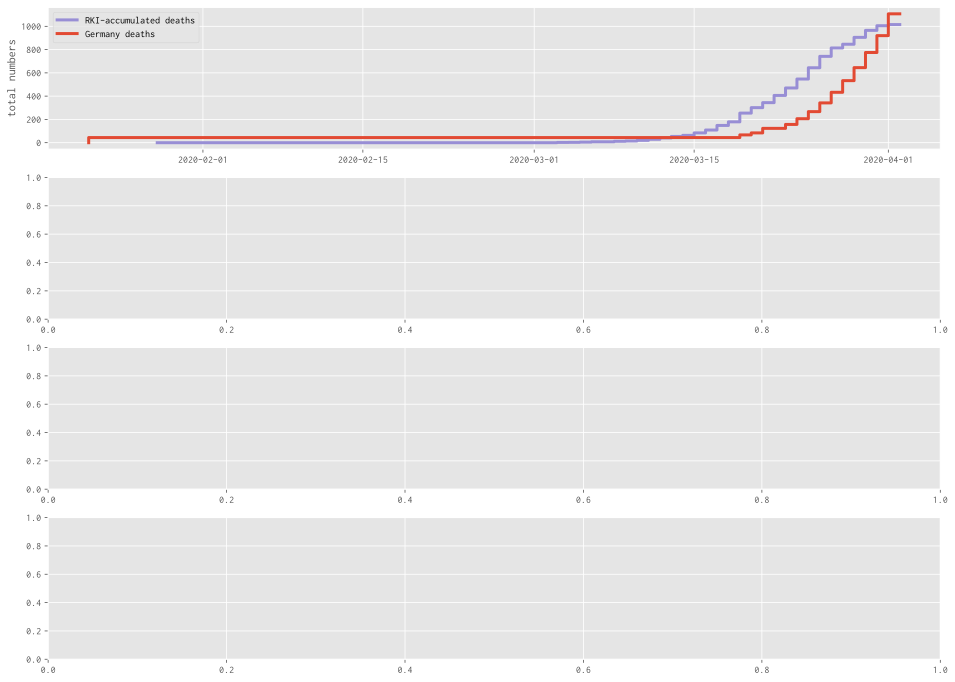

In [42]:

fig, axes = plt.subplots(4, 1, figsize=(16,12))
#co.plot_time_step(axes[0], cases, 'C1')
#co.plot_time_step(axes[0], cases_jh, 'C3')
co.plot_time_step(axes[0], deaths, 'C2')
co.plot_time_step(axes[0], deaths_jh, 'C0')


axes[0].set_yscale('linear')
#co.plot_change_bar()

In [43]:
cases_jh

2020-01-22        0
2020-02-27       46
2020-02-29       79
2020-03-01      130
2020-03-02      159
2020-03-03      196
2020-03-04      262
2020-03-05      482
2020-03-06      670
2020-03-07      799
2020-03-08     1040
2020-03-09     1176
2020-03-10     1457
2020-03-11     1908
2020-03-12     2078
2020-03-13     3675
2020-03-14     4585
2020-03-15     5795
2020-03-16     7272
2020-03-17     9257
2020-03-18    12327
2020-03-19    15320
2020-03-20    19848
2020-03-21    22213
2020-03-22    24873
2020-03-23    29056
2020-03-24    32986
2020-03-25    37323
2020-03-26    43938
2020-03-27    50871
2020-03-28    57695
2020-03-29    62095
2020-03-30    66885
2020-03-31    71808
2020-04-01    77872
2020-04-02    84794
Name: Germany, dtype: object

In [44]:
cases.tail(5)

date
2020-03-29 00:00:00+00:00    62653
2020-03-30 00:00:00+00:00    66692
2020-03-31 00:00:00+00:00    72333
2020-04-01 00:00:00+00:00    77464
2020-04-02 00:00:00+00:00    79625
Name: AnzahlFall, dtype: int64

In [45]:
cases_jh.tail(5)

2020-03-29    62095
2020-03-30    66885
2020-03-31    71808
2020-04-01    77872
2020-04-02    84794
Name: Germany, dtype: object

In [46]:
germany

,IdBundesland,Bundesland,Landkreis,Altersgruppe,Geschlecht,AnzahlFall,AnzahlTodesfall,ObjectId,Meldedatum,IdLandkreis,Datenstand,NeuerFall,NeuerTodesfall
0,1,Schleswig-Holstein,SK Flensburg,A15-A34,M,1,0,670153,2020-03-14T00:00:00.000Z,1001,"03.04.2020, 00:00 Uhr",0,-9
1,1,Schleswig-Holstein,SK Flensburg,A15-A34,M,2,0,670154,2020-03-19T00:00:00.000Z,1001,"03.04.2020, 00:00 Uhr",0,-9
2,1,Schleswig-Holstein,SK Flensburg,A15-A34,M,1,0,670155,2020-03-21T00:00:00.000Z,1001,"03.04.2020, 00:00 Uhr",0,-9
3,1,Schleswig-Holstein,SK Flensburg,A15-A34,M,1,0,670156,2020-03-27T00:00:00.000Z,1001,"03.04.2020, 00:00 Uhr",0,-9
4,1,Schleswig-Holstein,SK Flensburg,A15-A34,W,1,0,670157,2020-03-14T00:00:00.000Z,1001,"03.04.2020, 00:00 Uhr",0,-9
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32431,5,Nordrhein-Westfalen,SK Gelsenkirchen,A15-A34,W,1,0,677148,2020-03-15T00:00:00.000Z,5513,"03.04.2020, 00:00 Uhr",0,-9
32432,5,Nordrhein-Westfalen,SK Gelsenkirchen,A15-A34,W,1,0,677149,2020-03-17T00:00:00.000Z,5513,"03.04.2020, 00:00 Uhr",0,-9
32433,5,Nordrhein-Westfalen,SK Gelsenkirchen,A15-A34,W,2,0,677150,2020-03-18T00:00:00.000Z,5513,"03.04.2020, 00:00 Uhr",0,-9
32434,5,Nordrhein-Westfalen,SK Gelsenkirchen,A15-A34,W,1,0,677151,2020-03-24T00:00:00.000Z,5513,"03.04.2020, 00:00 Uhr",0,-9
